# Background Analysis for Hopping

In [1]:
import numpy as np
import matplotlib.pyplot as plt

COLORMAP = {
    "red" : "#AF272F",
    "orange" : "#BE531C",
    "green" : "#719949",
    "blue" : "#00558C",
    "purple" : "#642F6C",
}

FileNotFoundError: /mnt/CALC_SSD/bgkang/hopping_analysis/trajectories//MSD.dat not found.

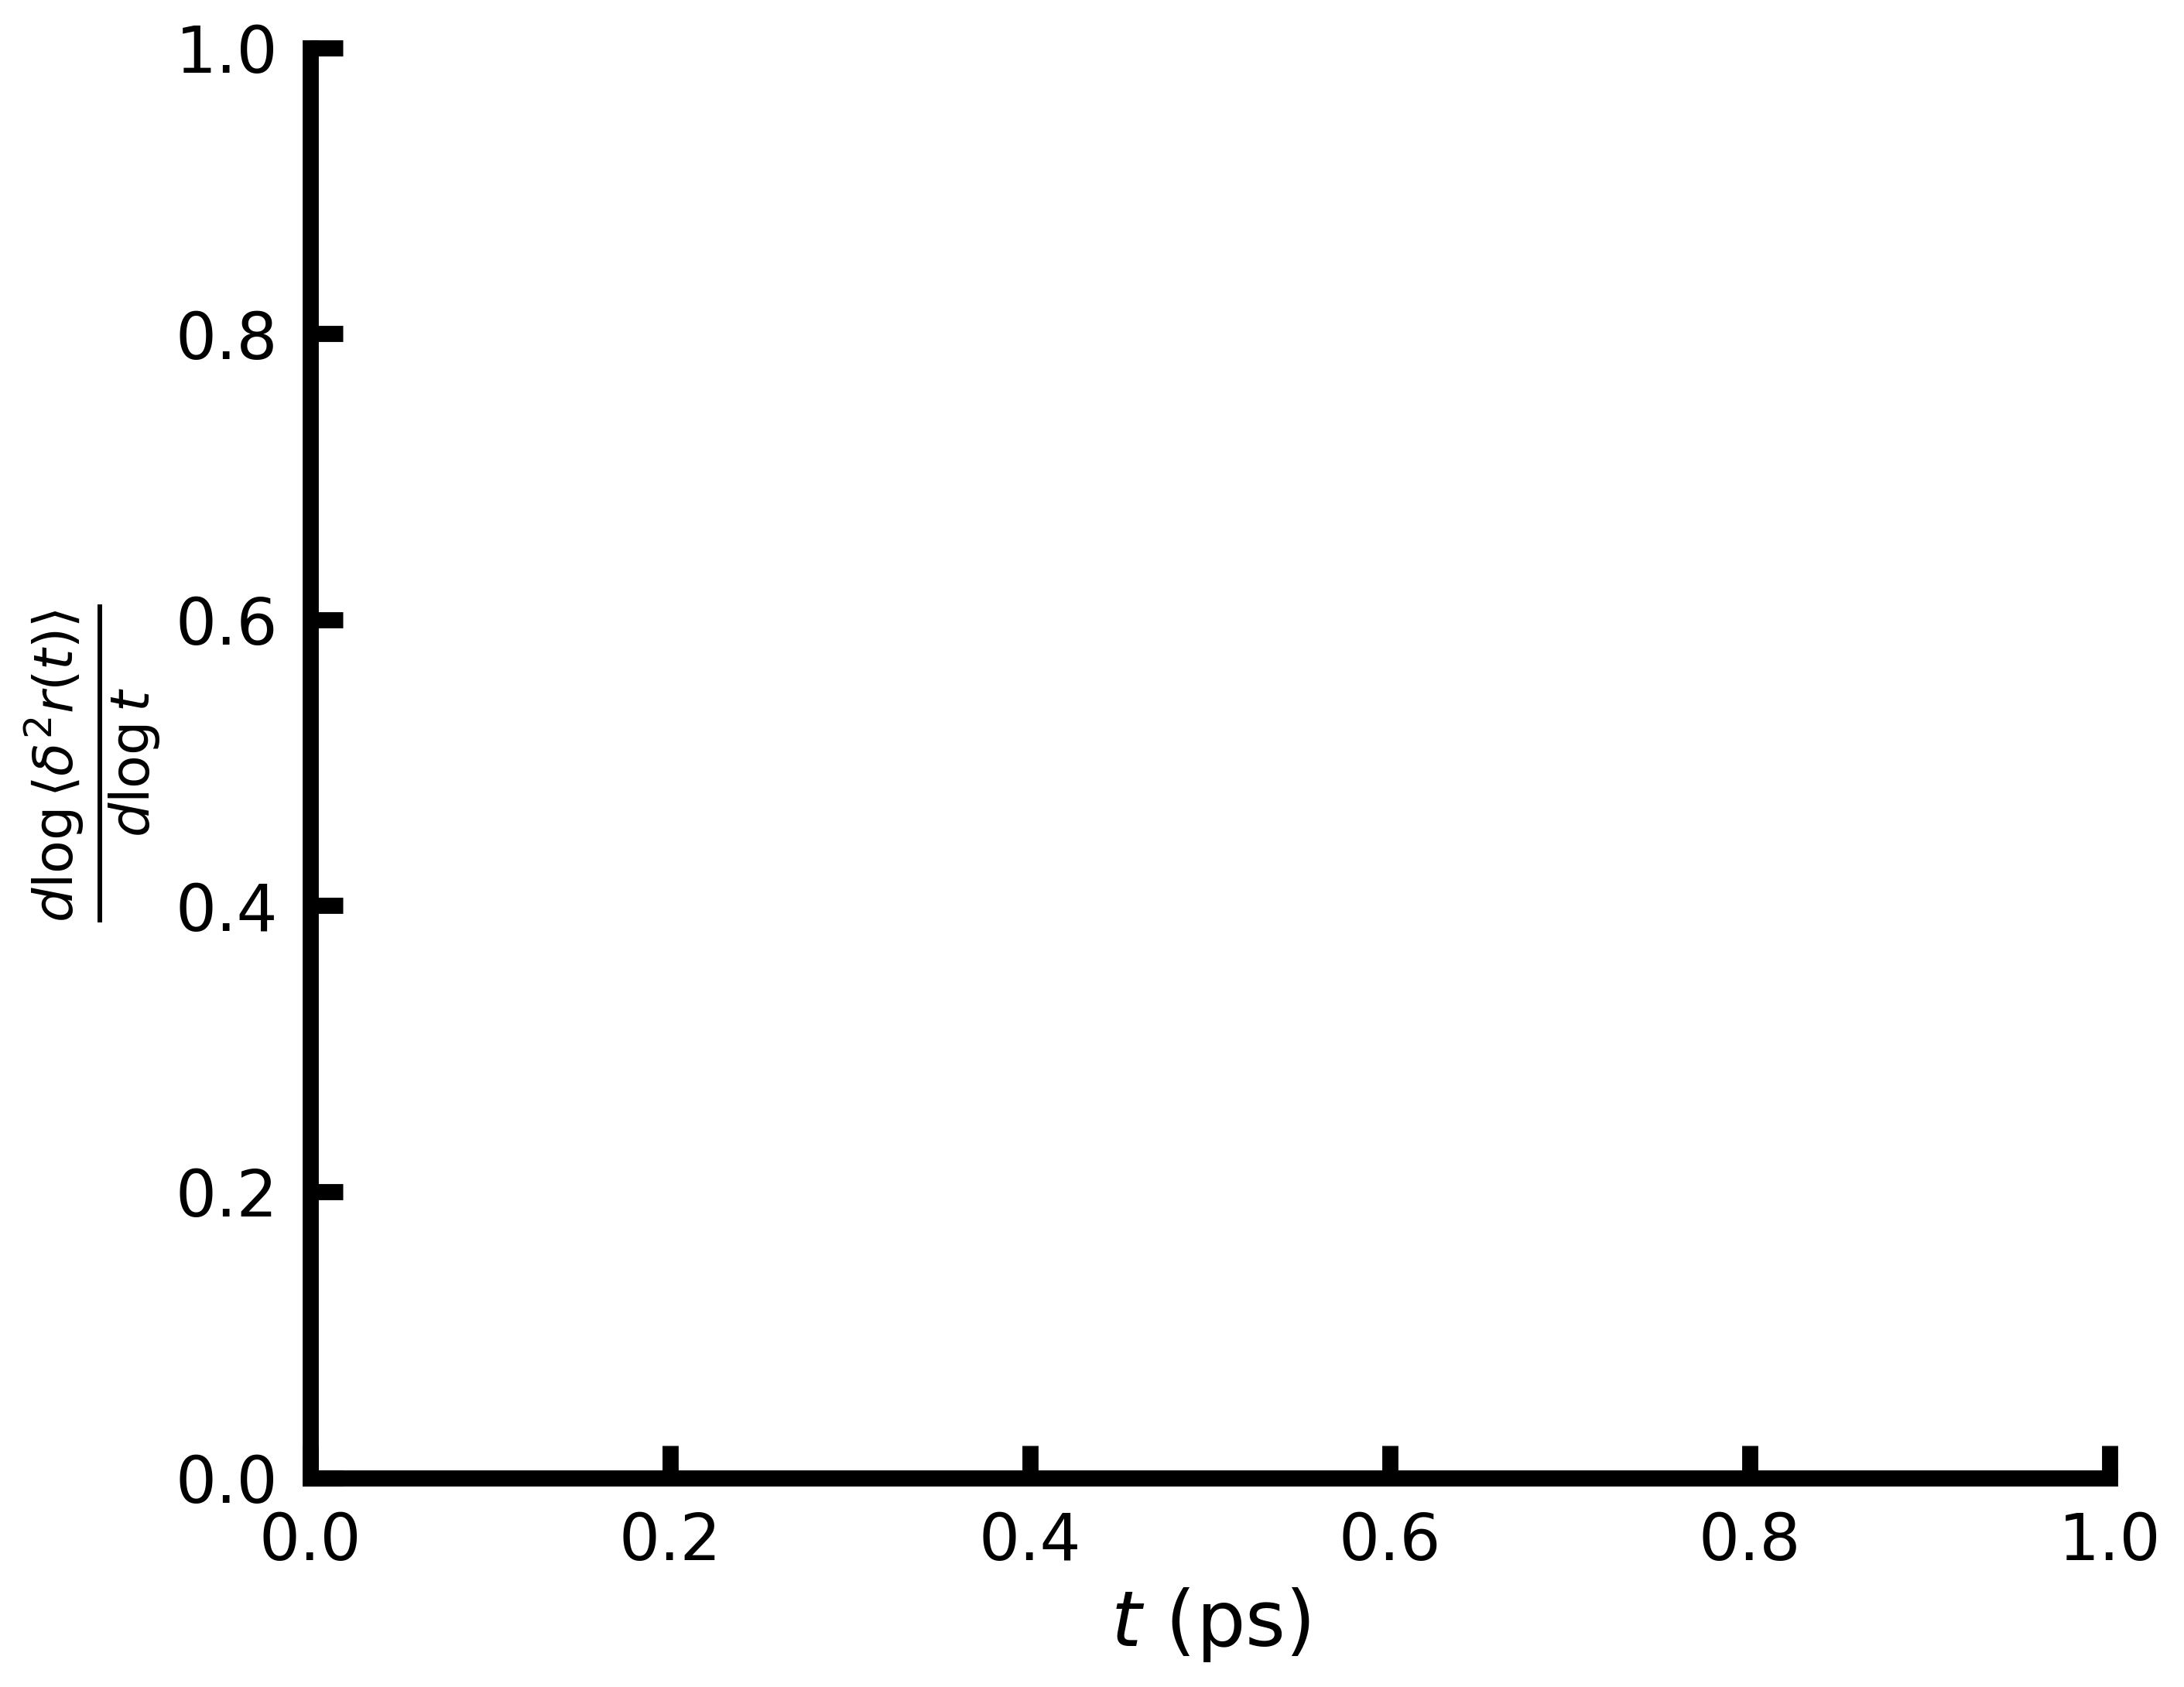

In [34]:
# MSD

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$t$ (ps)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\frac{d \log{\langle \delta^2 r(t)\rangle}}{d \log{t}}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/msd.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    t = avg[:,0]
    log = np.log(avg[:,2])

    dlog = log[1:] - log[:-1] 

    ax.plot(t[:-1], dlog / np.log(t[:-1]), linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)

ax.set_xscale('log')
ax.set_xlim(1, 1E3)

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("msd.png", dpi = 300, bbox_inches = 'tight')
plt.show()

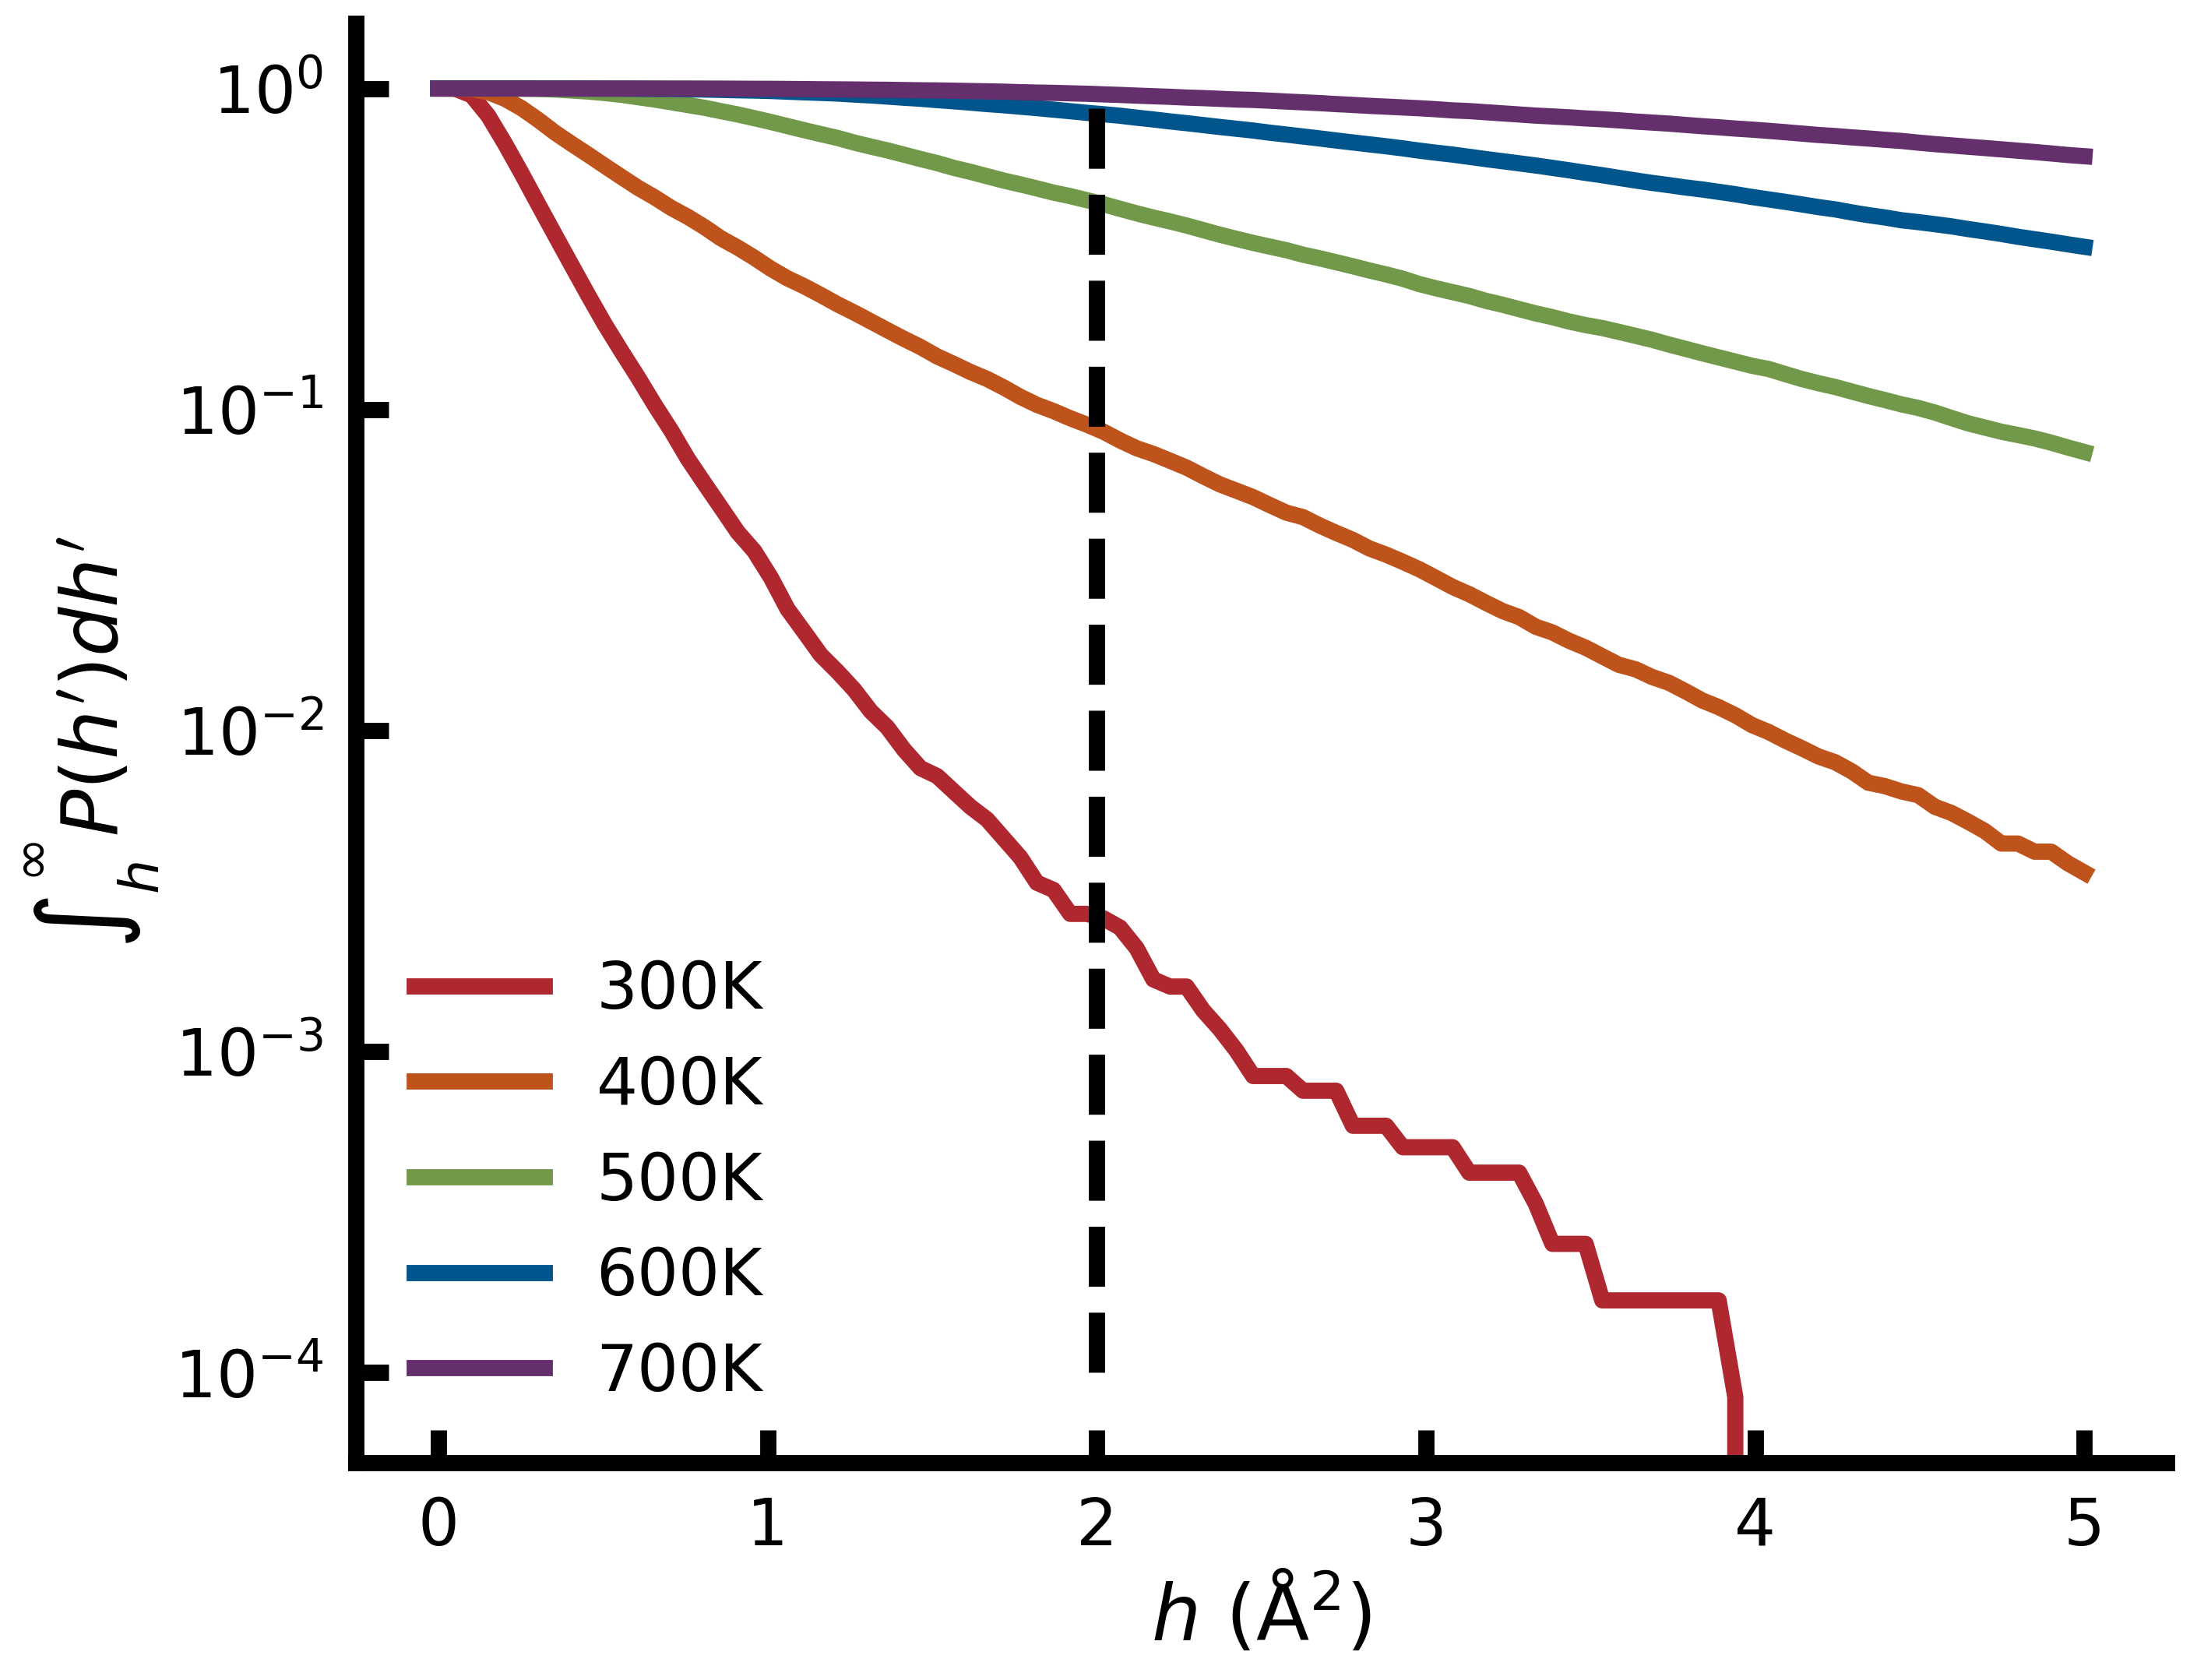

In [2]:
# Cumulative Probabilities

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\int^{\infty}_h P(h') dh'$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
h_axis = np.linspace(0, 5.0, 100)
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1])
    data = np.stack(data).flatten()

    result = []
    for h in h_axis:
        result.append((data > h).sum() / data.shape[0])

    ax.plot(h_axis, result, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)

ax.set_yscale('log')

ax.vlines(2, 1E-4, 1E0, color = 'k', linewidth = params['linewidth'], linestyle = '--')

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("cum_prob.png", dpi = 300, bbox_inches = 'tight')
plt.show()

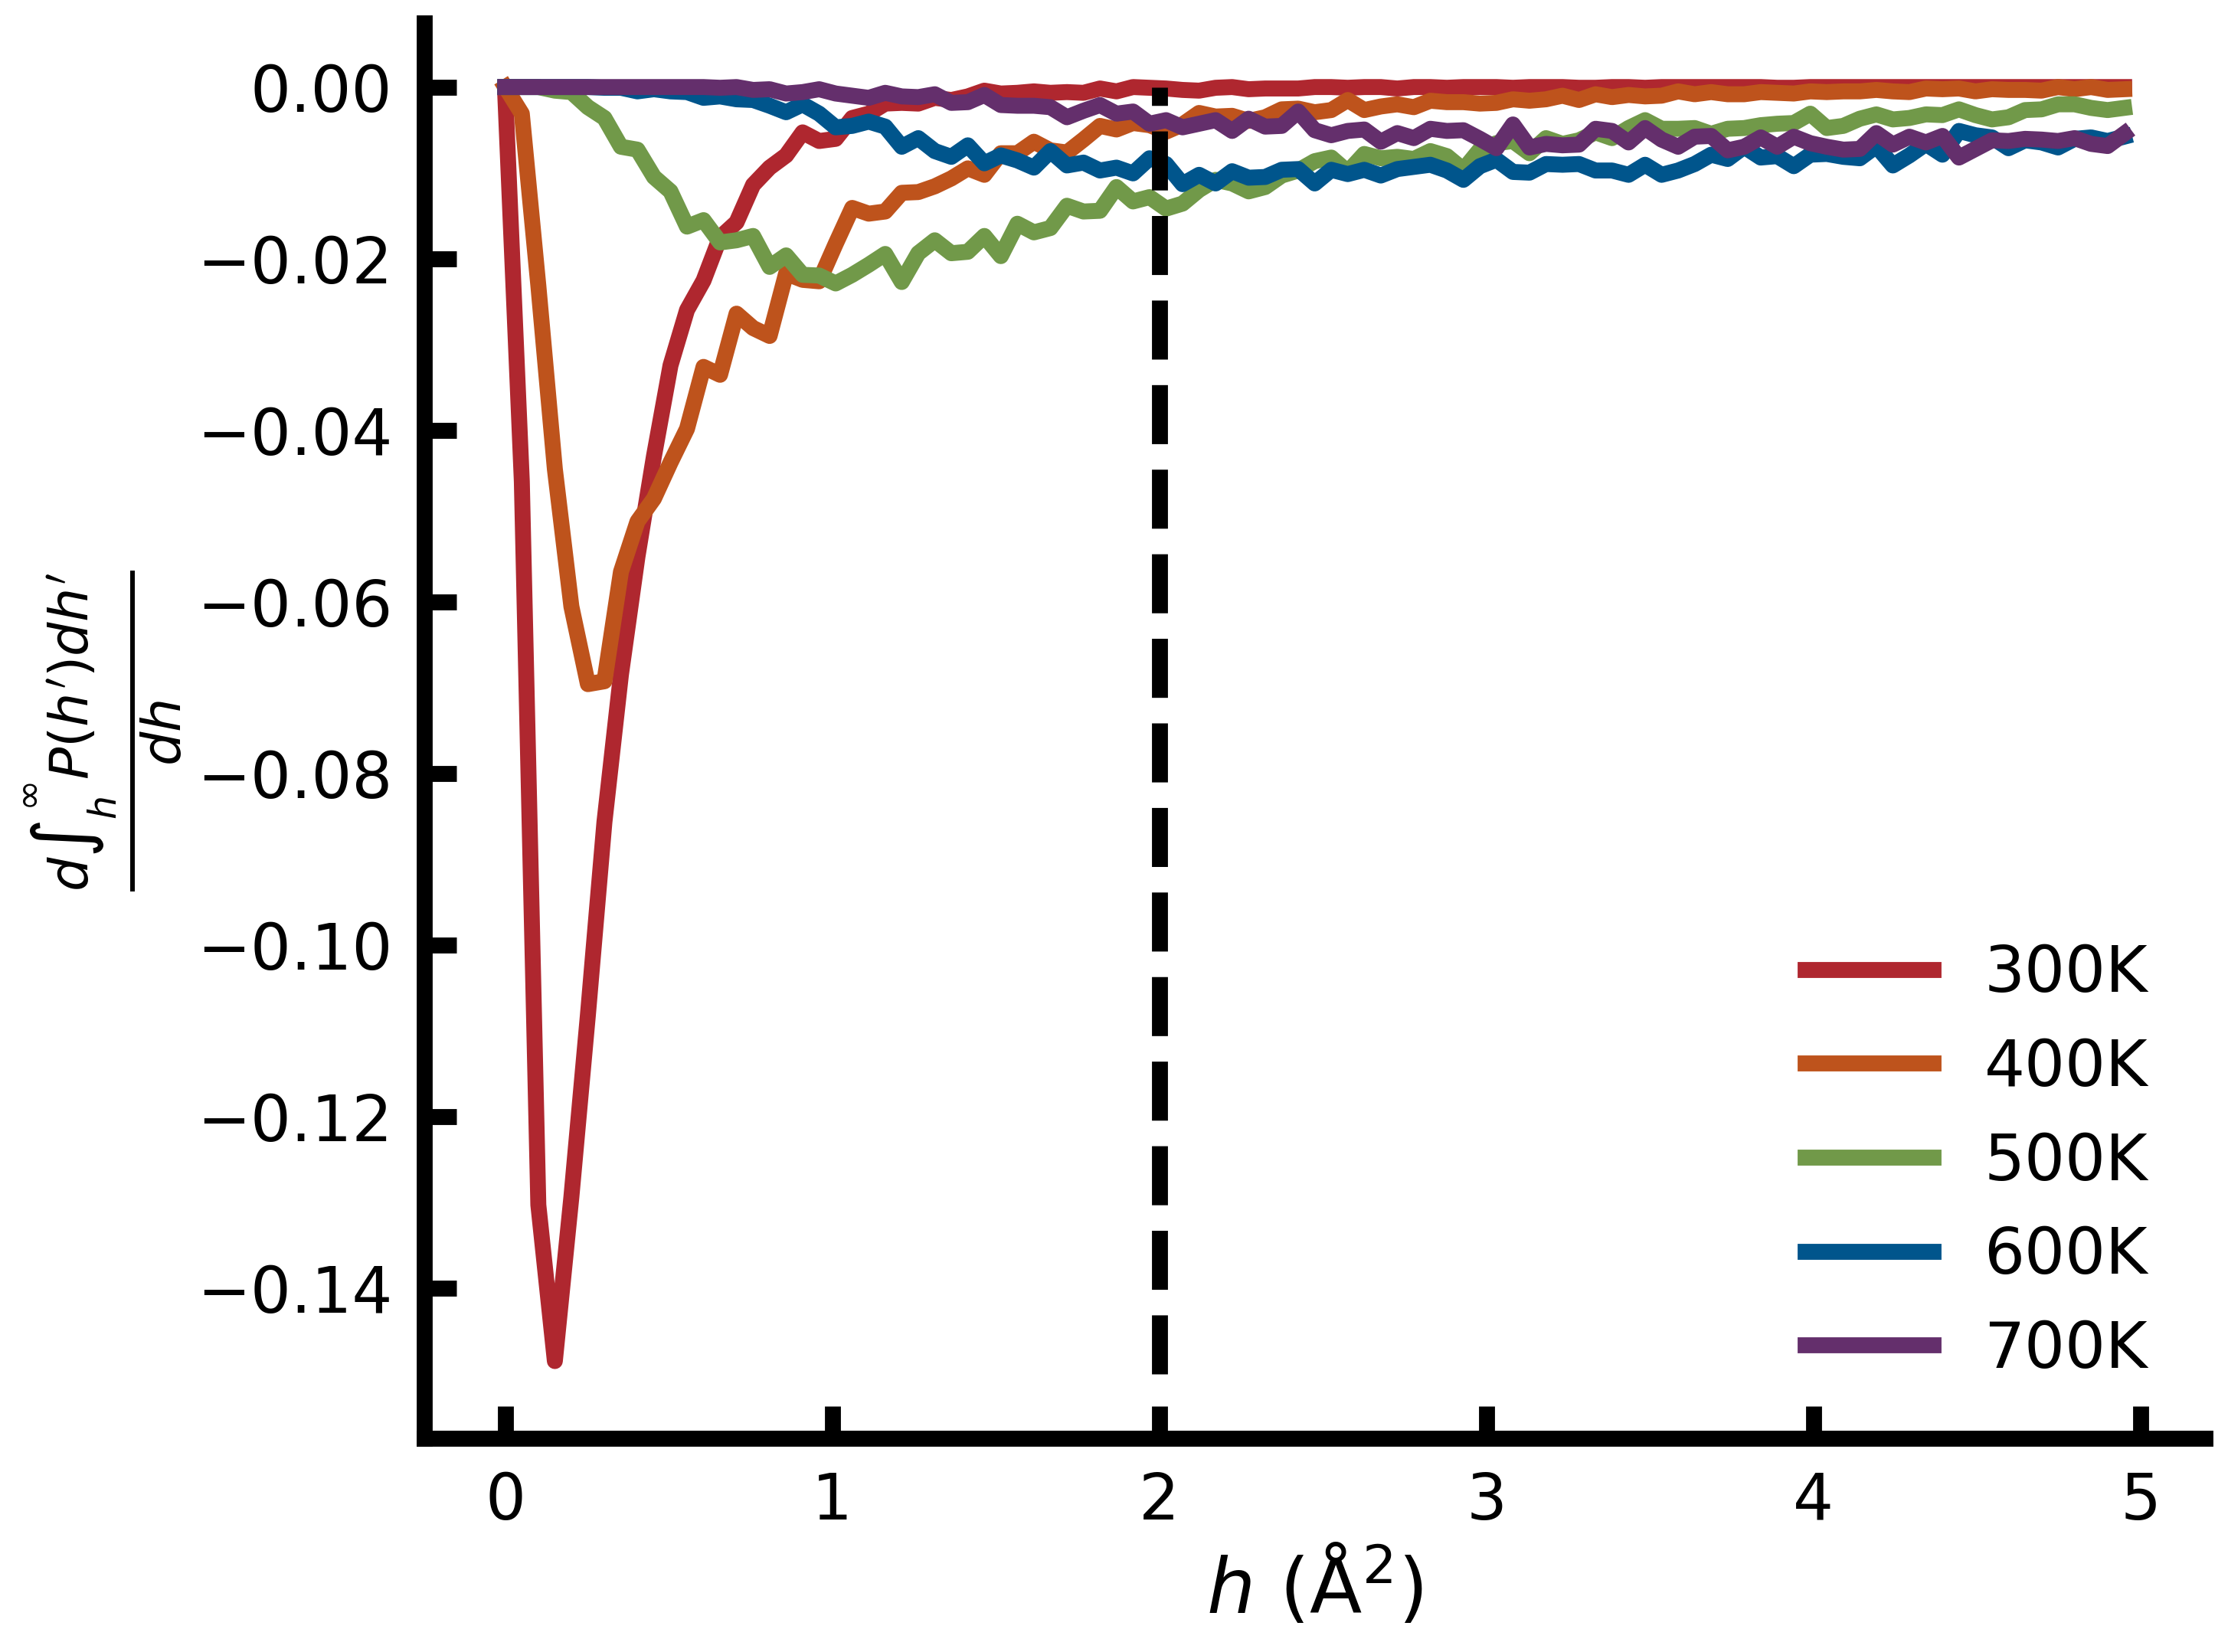

In [8]:
# Cumulative Probabilities

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\frac{d \int^{\infty}_h P(h') dh'}{dh}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
h_axis = np.linspace(0, 5.0, 100)
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1])
    data = np.stack(data).flatten()

    result = []
    for h in h_axis:
        result.append((data > h).sum() / data.shape[0])
    
    result = np.array(result[1:]) - np.array(result[:-1])

    ax.plot(h_axis[:-1], result, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)

# ax.set_yscale('log')

ax.vlines(2, -0.15, 0, color = 'k', linewidth = params['linewidth'], linestyle = '--')

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

# plt.savefig("cum_prob.png", dpi = 300, bbox_inches = 'tight')
plt.show()